## Πρόγραμμα που εκτυπώνει ένα γράμμα με την χρήση γεννητικών αλγορίθμων

In [1]:
import random
import matplotlib.pyplot as plt

In [2]:
# κάθε κόμβος του grid pane αντιπροσοπεύεται από έναν αριθμό
# το 1 σημαίνει ότι ο κόμβος είναι χρωματισμένος και το 0 σημαίνει
# ότι δεν είναι χρωματισμένος.
N = [1, 1, 0, 0, 0, 0, 1,
     1, 1, 0, 0, 0, 0, 1,
     1, 1, 0, 0, 0, 0, 1,
     1, 0, 1, 0, 0, 0, 1,
     1, 0, 1, 0, 0, 0, 1,
     1, 0, 0, 1, 0, 0, 1,
     1, 0, 0, 1, 0, 0, 1,
     1, 0, 0, 0, 1, 0, 1,
     1, 0, 0, 0, 1, 0, 1,
     1, 0, 0, 0, 0, 1, 1,
     1, 0, 0, 0, 0, 1, 1]

B = [1, 1, 1, 1, 1, 0, 0,
     1, 0, 0, 0, 0, 1, 0,
     1, 0, 0, 0, 0, 1, 0,
     1, 0, 0, 0, 0, 1, 0,
     1, 0, 0, 0, 1, 0, 0,
     1, 1, 1, 1, 0, 0, 0,
     1, 0, 0, 0, 1, 0, 0,
     1, 0, 0, 0, 0, 1, 0,
     1, 0, 0, 0, 0, 1, 0,
     1, 0, 0, 0, 0, 1, 0,
     1, 1, 1, 1, 1, 0, 0]

K = [1, 0, 0, 0, 0, 0, 0,
     0, 0, 0, 0, 0, 1, 0,
     1, 0, 0, 0, 0, 0, 0,
     0, 0, 0, 1, 0, 0, 0,
     1, 0, 0, 0, 0, 0, 0,
     0, 1, 0, 0, 0, 0, 0,
     1, 0, 0, 0, 0, 0, 0,
     0, 0, 0, 1, 0, 0, 0,
     1, 0, 0, 0, 0, 0, 0,
     0, 0, 0, 0, 0, 1, 0,
     1, 0, 0, 0, 0, 0, 0]

In [3]:
# μία συνάρτηση που επιστρέφει size
# πιθανές λύσεις του προβλήματος με τυχαίο τρόπο
# δηλαδη δημιουργεί έναν τυχαίο πληθυσμό
def generate_population(size):
    population_ = []
    for _ in range(size):
        population_.append([random.choice([0, 1]) for _ in range(11 * 7)])

    return population_

In [4]:
# μία συνάρτηση που επιστρέφει ένα value που αντιπροσοπεύει πόσο καλη είναι
# μία πιθανή λύση, όσο πιο μεγάλο το value τόσο πιο καλή και η λύση
def fitness(individual):
    value = 0

    for i in range(11 * 7):
        if individual[i] == grid_pane[i]:
            value += 1

    return value

In [5]:
# μεθοδος που επιστρέφει ταξινομημενο το population με βαση το fitness σε αύξουσα σειρά
def sort_population_by_fitness(population_):
    scores = []
    for p in population_:
        scores.append(fitness(p))
    return [x for _, x in sorted(zip(scores, population_))]

In [6]:
def tournament_selection(population_passed):
    individuals = []
    parent = []
    # επιλέγω 4 τυχαία διαφορετικά χρωμοσώματα
    for _ in range(4):
        # επιλογη χρωμοσώματος με τυχαίο τρόπο
        ind = population_passed[random.randrange(0, len(population_passed))]
        # έλεγχος για να μη μπουν στη λίστα ίδια χρωμοσώματα
        while ind in individuals:
            ind = population_passed[random.randrange(0, len(population_passed))]
        # προσθέτω το χρωμόσωμα στη λίστα
        individuals.append(ind)

    # για κάθε χρωμόσωμα που επιλέχτηκε διαλέγω αυτό με την καλύτερη βαθμολογία
    for ind in individuals:
        # το len(parent) == 0 το βάζουμε για να μπει μέσα την πρώτη φορα
        if len(parent) == 0 or fitness(ind) > fitness(parent):
            parent = ind

    return parent

In [7]:
# μέθοδος που επιστρέφει δύο παιδιά
def single_point_crossover(individual_a, individual_b):
    # τυχαία επιλογή του σημείου που θα γίνει το crossover
    point = random.randint(1, len(individual_a) - 1)

    # δημιουργία νέων απογόνων
    for i in range(point, len(individual_a)):
        individual_a[i], individual_b[i] = individual_b[i], individual_a[i]

    return [individual_a, individual_b]

In [8]:
# συνάρτηση που κάνει μετάλλαξη σε num ψηφία,
# η πιθανότητα να γίνει η μετάλλαξη σε ένα χρωμόσωμα
# είναι 50%
def mutate(individual, num=1, probability=0.5):
    for _ in range(num):
        index = random.randrange(len(individual))
        # το random.random() επιστρέφει μία τυχαία τιμή ανάμεσα στο 0 και 1
        if random.random() > probability:
            individual[index] = individual[index]
        else:
            # αν η μετάλλαξη γίνει τότε το ψηφίο από 0 θα γίνει 1 ή από 1 θα γίνει 0
            individual[index] = abs(individual[index] - 1)

    return individual

In [9]:
# μέθοδος που δημοιυργεί μία νέα γενιά
def make_next_generation(previous_population):
    next_generation = []

    for _ in range(len(previous_population)):
        # επιλογή δύο γονέων
        parent1 = tournament_selection(previous_population)
        parent2 = tournament_selection(previous_population)
        # ελέγχουμε ότι οι γονείς δεν αποτελούν το ίδιο χρωμόσωμα,
        # διαφορετικά δεν έχει νόημα να γίνει το crossover
        while parent1 == parent2:
            parent1 = tournament_selection(previous_population)
            parent2 = tournament_selection(previous_population)
        # δημιουργία απογόνων
        child1 = single_point_crossover(parent1, parent2)[0]
        child2 = single_point_crossover(parent1, parent2)[1]
        # επιλέγουμε το πιο δυνατό παιδί
        if fitness(child1) > fitness(child2):
            next_generation.append(child1)
        else:
            next_generation.append(child2)

    return next_generation

In [10]:
# μας επιστρέφει την βαθμολογία μιας γενιάς
def fitness_all_population(population_):
    scores = []
    # προσθέτουμε τις βαθμολογίες όλων των χρωμοσωμάτων μιας γενιάς
    for p in population_:
        scores.append(fitness(p))
    return scores

In [11]:
# πόσες γενιές θα δημιουργήσουμε
generations = 60
# πόσος θα είναι ο πληθυσμός σε κάθε γενιά
population_size = 10000
# δημιουργία πληθυσμού
population = generate_population(population_size)
find = False

# Διαλ΄γεφουμε ποιο γράμμα από τα αρχικοποιημένα θα εμφανίσουμε
grid_pane = N

for i in range(generations):
    print(f"=========GENERATION {i + 1} ===== FITNESS: {sum(fitness_all_population(population))}========= ")

    # αν δημιουργηθούν όλες οι γενιές σταματάμε το loop
    # if i == generations:
    #     break
    # ψάχνουμε αν βρέθηκε η λύση
    for p in population:
        # αν το fitness του p είναι 77 τότε σημαίνει ότι
        # βρέθηκε ένας πίνακας που είναι ακριβώς ίδιος με τον
        # πίνακα που ψαχνουμε
        if fitness(p) == 77:
            find = True
            break

    # αν βρεθεί η λύση σταματάμε το loop
    if find:
        break

    # δημιουργία νέας γενιάς
    population = make_next_generation(population)

=========GENERATION 1 ===== FITNESS: 385715========= 
=========GENERATION 2 ===== FITNESS: 439384========= 
=========GENERATION 3 ===== FITNESS: 470697========= 
=========GENERATION 4 ===== FITNESS: 497703========= 
=========GENERATION 5 ===== FITNESS: 515360========= 
=========GENERATION 6 ===== FITNESS: 541782========= 
=========GENERATION 7 ===== FITNESS: 555478========= 
=========GENERATION 8 ===== FITNESS: 560027========= 
=========GENERATION 9 ===== FITNESS: 578943========= 
=========GENERATION 10 ===== FITNESS: 595777========= 
=========GENERATION 11 ===== FITNESS: 609770========= 
=========GENERATION 12 ===== FITNESS: 630646========= 
=========GENERATION 13 ===== FITNESS: 626012========= 
=========GENERATION 14 ===== FITNESS: 638564========= 
=========GENERATION 15 ===== FITNESS: 643913========= 
=========GENERATION 16 ===== FITNESS: 659880========= 
=========GENERATION 17 ===== FITNESS: 664721========= 
=========GENERATION 18 ===== FITNESS: 690298========= 
=========GENERATION


FINAL RESULT FITNESS: 77
[1, 1, 0, 0, 0, 0, 1]
[1, 1, 0, 0, 0, 0, 1]
[1, 1, 0, 0, 0, 0, 1]
[1, 0, 1, 0, 0, 0, 1]
[1, 0, 1, 0, 0, 0, 1]
[1, 0, 0, 1, 0, 0, 1]
[1, 0, 0, 1, 0, 0, 1]
[1, 0, 0, 0, 1, 0, 1]
[1, 0, 0, 0, 1, 0, 1]
[1, 0, 0, 0, 0, 1, 1]
[1, 0, 0, 0, 0, 1, 1]


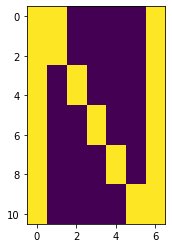

In [12]:
# παίρνουμε το καλυτερο χρωμόσωμα της γενιάς το οποίο βρίσκεται στο τέλος της λίστας
# καθώς είναι ταξινομημένη σε αύξουσα σειρά
best_individual = sort_population_by_fitness(population)[-1]
print(f"\nFINAL RESULT FITNESS: {fitness(best_individual)}")

# εκτυπώνουμε τον πίνακα σε κατάλληλη μορφή
cnt = 0
row = []
best_individual_2d = []
for i in range(len(best_individual)):
    cnt += 1
    row.append(best_individual[i])
    if cnt % 7 == 0:
        cnt = 0
        print(row)
        best_individual_2d.append(row[:])
        row.clear()

plt.imshow(best_individual_2d)
plt.show()